<a href="https://colab.research.google.com/github/alenarth/busca_astar_curitiba/blob/main/busca_astar_curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca A*

O objetivo desta tarefa é a construção de um algorítmo de busca. A cidade de origem é Porto União e a cidade de destino é Curitiba. No mapa abaixo você pode visualizar as distâncias pela estrada entre cada uma das cidades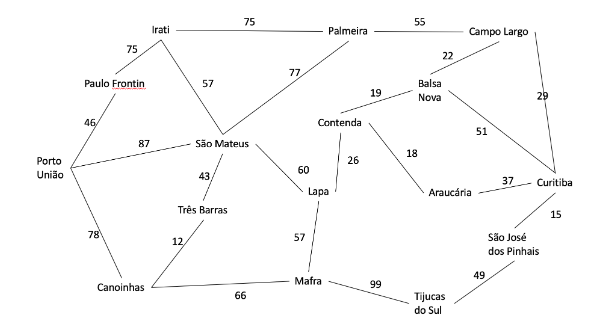

In [1]:
class Vertice:

  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

In [2]:
class Adjacente:
  def __init__(self, vertice, custo):
    self.vertice = vertice
    self.custo = custo
    self.distancia_aestrela = vertice.distancia_objetivo + self.custo

In [3]:
class Grafo:
  portoUniao = Vertice("Porto União", 203)
  pauloFrontin = Vertice("Paulo Frontin", 172)
  canoinhas = Vertice("Canoinhas", 141)
  irati = Vertice("Irati", 139)
  palmeira = Vertice("Palmeira", 59)
  campoLargo = Vertice("Campo Largo", 27)
  curitiba = Vertice("Curitiba", 0)
  balsaNova = Vertice("Balsa Nova", 41)
  araucaria = Vertice("Araucária", 23)
  saoJose = Vertice("São José dos Pinhais", 13)
  contenda = Vertice("Contenda", 39)
  mafra = Vertice("Mafra", 94)
  tijucas = Vertice("Tijucas do Sul", 56)
  lapa = Vertice("Lapa", 74)
  saoMateus = Vertice("São Mateus do Sul", 123)
  tresBarras = Vertice("Três Barras", 131)


  portoUniao.adiciona_adjacente(Adjacente(pauloFrontin, 46))
  portoUniao.adiciona_adjacente(Adjacente(canoinhas, 78))
  portoUniao.adiciona_adjacente(Adjacente(saoMateus, 87))

  pauloFrontin.adiciona_adjacente(Adjacente(portoUniao, 46))
  pauloFrontin.adiciona_adjacente(Adjacente(irati, 75))

  canoinhas.adiciona_adjacente(Adjacente(portoUniao, 78))
  canoinhas.adiciona_adjacente(Adjacente(tresBarras, 12))
  canoinhas.adiciona_adjacente(Adjacente(mafra, 66))

  irati.adiciona_adjacente(Adjacente(pauloFrontin, 75))
  irati.adiciona_adjacente(Adjacente(palmeira, 75))
  irati.adiciona_adjacente(Adjacente(saoMateus, 57))

  palmeira.adiciona_adjacente(Adjacente(irati, 75))
  palmeira.adiciona_adjacente(Adjacente(saoMateus, 77))
  palmeira.adiciona_adjacente(Adjacente(campoLargo, 55))

  campoLargo.adiciona_adjacente(Adjacente(palmeira, 55))
  campoLargo.adiciona_adjacente(Adjacente(balsaNova, 22))
  campoLargo.adiciona_adjacente(Adjacente(curitiba, 29))

  curitiba.adiciona_adjacente(Adjacente(campoLargo, 29))
  curitiba.adiciona_adjacente(Adjacente(balsaNova, 51))
  curitiba.adiciona_adjacente(Adjacente(araucaria, 37))
  curitiba.adiciona_adjacente(Adjacente(saoJose, 15))

  balsaNova.adiciona_adjacente(Adjacente(curitiba, 51))
  balsaNova.adiciona_adjacente(Adjacente(campoLargo, 22))
  balsaNova.adiciona_adjacente(Adjacente(contenda, 19))

  araucaria.adiciona_adjacente(Adjacente(curitiba, 37))
  araucaria.adiciona_adjacente(Adjacente(contenda, 18))

  saoJose.adiciona_adjacente(Adjacente(curitiba, 15))
  saoJose.adiciona_adjacente(Adjacente(tijucas, 49))

  contenda.adiciona_adjacente(Adjacente(balsaNova, 19))
  contenda.adiciona_adjacente(Adjacente(araucaria, 18))
  contenda.adiciona_adjacente(Adjacente(lapa, 26))

  mafra.adiciona_adjacente(Adjacente(tijucas, 99))
  mafra.adiciona_adjacente(Adjacente(lapa, 57))
  mafra.adiciona_adjacente(Adjacente(canoinhas, 66))

  tijucas.adiciona_adjacente(Adjacente(mafra, 99))
  tijucas.adiciona_adjacente(Adjacente(saoJose, 49))

  lapa.adiciona_adjacente(Adjacente(contenda, 26))
  lapa.adiciona_adjacente(Adjacente(saoMateus, 60))
  lapa.adiciona_adjacente(Adjacente(mafra, 57))

  saoMateus.adiciona_adjacente(Adjacente(palmeira, 77))
  saoMateus.adiciona_adjacente(Adjacente(irati, 57))
  saoMateus.adiciona_adjacente(Adjacente(lapa, 60))
  saoMateus.adiciona_adjacente(Adjacente(tresBarras, 43))
  saoMateus.adiciona_adjacente(Adjacente(portoUniao, 87))

  tresBarras.adiciona_adjacente(Adjacente(saoMateus, 43))
  tresBarras.adiciona_adjacente(Adjacente(canoinhas, 12))

In [4]:
grafo = Grafo()

### Vetor ordenado (adjacente)

In [5]:
import numpy as np
class VetorOrdenado:

  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    # Mudança no tipo de dados
    self.valores = np.empty(self.capacidade, dtype=object)

  # Referência para o vértice e comparação com a distância A*
  def insere(self, adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_aestrela > adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ', self.valores[i].vertice.rotulo, ' - ',
              self.valores[i].custo, ' - ',
              self.valores[i].vertice.distancia_objetivo, ' - ',
              self.valores[i].distancia_aestrela)

In [6]:
grafo.portoUniao.adjacentes

In [7]:
grafo.portoUniao.adjacentes[0].vertice.rotulo, grafo.portoUniao.adjacentes[0].vertice.distancia_objetivo

('Paulo Frontin', 172)

In [8]:
grafo.portoUniao.adjacentes[0].distancia_aestrela, grafo.portoUniao.adjacentes[0].custo

(218, 46)

In [9]:
vetor = VetorOrdenado(3)
vetor.insere(grafo.portoUniao.adjacentes[0])
vetor.insere(grafo.portoUniao.adjacentes[1])
vetor.insere(grafo.portoUniao.adjacentes[2])

In [10]:
vetor.imprime()

0  -  São Mateus do Sul  -  87  -  123  -  210
1  -  Paulo Frontin  -  46  -  172  -  218
2  -  Canoinhas  -  78  -  141  -  219


## Busca AEstrela

In [11]:
class AEstrela:
  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('----------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)

In [12]:
busca_aestrela = AEstrela(grafo.curitiba)
busca_aestrela.buscar(grafo.portoUniao)

----------
Atual: Porto União
0  -  São Mateus do Sul  -  87  -  123  -  210
1  -  Paulo Frontin  -  46  -  172  -  218
2  -  Canoinhas  -  78  -  141  -  219
----------
Atual: São Mateus do Sul
0  -  Lapa  -  60  -  74  -  134
1  -  Palmeira  -  77  -  59  -  136
2  -  Três Barras  -  43  -  131  -  174
3  -  Irati  -  57  -  139  -  196
----------
Atual: Lapa
0  -  Contenda  -  26  -  39  -  65
1  -  Mafra  -  57  -  94  -  151
----------
Atual: Contenda
0  -  Araucária  -  18  -  23  -  41
1  -  Balsa Nova  -  19  -  41  -  60
----------
Atual: Araucária
0  -  Curitiba  -  37  -  0  -  37
----------
Atual: Curitiba
